![Advertising](img/advertising.jpeg)

**Prédire les ventes à partir des investissements publicitaires**

**Contexte** :

Une entreprise souhaite mieux comprendre l’impact de ses dépenses publicitaires sur ses ventes. Elle dispose d’un jeu de données ([`data/advertising.csv`](data/advertising.csv)) comprenant les montants investis dans trois canaux de communication (TV, radio, presse écrite) ainsi que les ventes correspondantes. Vous êtes chargé·e d’exploiter ces données pour construire un modèle de prédiction fiable.

⸻

🎯 **Objectif** :

Construire un modèle de régression linéaire permettant de prédire les ventes en fonction des investissements publicitaires dans les trois médias, en suivant un pipeline de modélisation complet.

- Exploration des données (EDA) :
    - Analyse descriptive
    - Visualisation des relations entre variables
    - Identification des corrélations
- Préparation des données :
    - Nettoyage des données (valeurs manquantes, outliers)
    - Normalisation ou standardisation si nécessaire
    - Séparation train/test
- Modélisation :
    - Implémentation d’un modèle de régression linéaire
- Évaluation :
    - Utilisation de métriques pertinentes : RMSE, R², MAE
- Intégration simple du modèle dans un script interactif
    - Intégrer votre modèle dans un script Python simple qui permet à un utilisateur de faire une prédiction à partir de nouvelles données.

# Import lib

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler
import joblib


# 1. Exploration des données (EDA) :
    - Analyse descriptive
    - Visualisation des relations entre variables
    - Identification des corrélations



In [255]:
# Loading
df = pd.read_csv("data/advertising.csv")

## Analyse descriptive

In [256]:
# Exploration
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [257]:
# Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [258]:
# Analyse descriptive
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Visualisation des relations entre variables

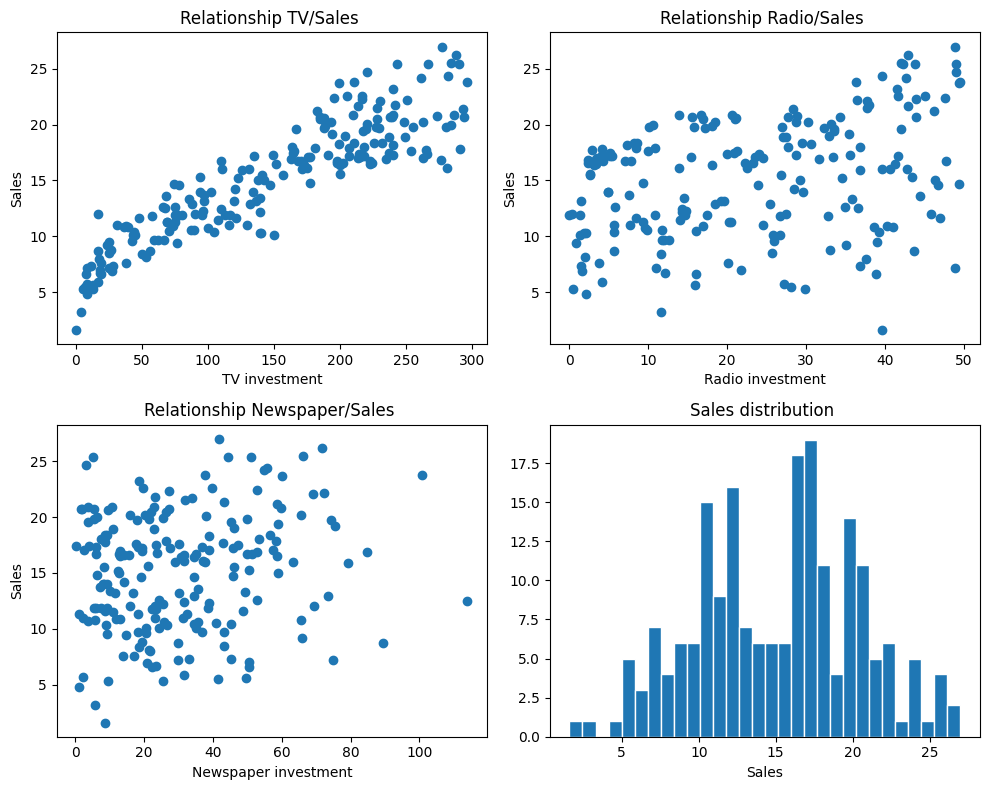

In [259]:
# Visualisation des relations entre variables

plt.figure(figsize=(10,8))

# Premier graphique (en haut à gauche) : diagramme en barres
plt.subplot(2,2,1)                                  # 2 lignes, 2 colonnes, 1er sous-graphe
plt.scatter(df["TV"], df["Sales"])
plt.xlabel("TV investment")
plt.ylabel("Sales")
plt.title("Relationship TV/Sales ")

# Deuxième graphique (en haut à droite) : nuage de points (scatter plot)
plt.subplot(2,2,2)                                  # 2 lignes, 2 colonnes, 2e sous-graphe
plt.scatter(df["Radio"], df["Sales"])
plt.xlabel("Radio investment")
plt.ylabel("Sales")
plt.title("Relationship Radio/Sales ")

# Troisième graphique (en bas à gauche) : histogramme
plt.subplot(2,2,3)                                  # 2 lignes, 2 colonnes, 3e sous-graphe
plt.scatter(df["Newspaper"], df["Sales"])
plt.xlabel("Newspaper investment")
plt.ylabel("Sales")
plt.title("Relationship Newspaper/Sales ")

# Quatrième graphique (en bas à droite) : diagramme circulaire (camembert)
plt.subplot(2,2,4)                                  # 2 lignes, 2 colonnes, 4e sous-graphe
plt.hist(df["Sales"], bins = 30, edgecolor='w')
plt.xlabel("Sales")

plt.title("Sales distribution ")
# Ajuste automatiquement les espacements entre les sous-graphes pour éviter les chevauchements
plt.tight_layout()

# Affiche l’ensemble des graphiques
plt.show()


type per_TV <class 'int'>


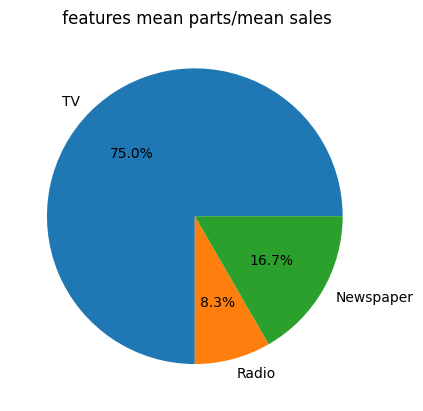

In [260]:
mean_investement_TV = df["TV"].mean()
mean_investement_Radio = df["Radio"].mean()
mean_investement_Newspaper = df["Newspaper"].mean()
mean_sales=df["Sales"].mean()
per_TV = mean_investement_TV/mean_sales
print("type per_TV",type(int(per_TV)))
per_Radio = mean_investement_Radio/mean_sales
per_Newspaper = mean_investement_Newspaper/mean_sales

list_features_names = ["TV","Radio","Newspaper"]
list_features_names 
list_features_percent = [int(per_TV),int(per_Radio),int(per_Newspaper)]
list_features_percent 
plt.pie(list_features_percent,labels = list_features_names, autopct='%1.1f%%')
plt.title(" features mean parts/mean sales")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14316\3791514786.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Total investment per means')

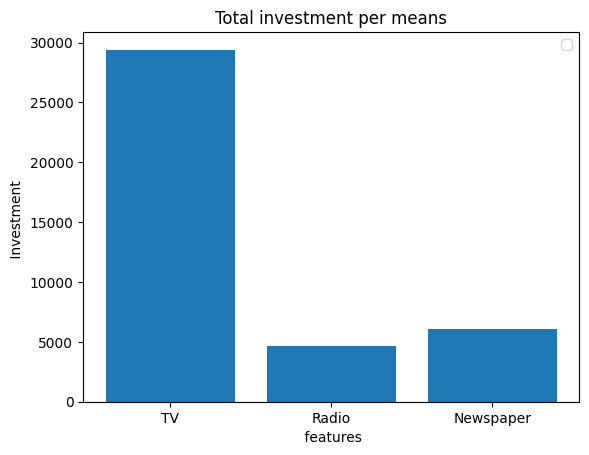

In [261]:

plt.bar(list_features_names, [df["TV"].sum(),df["Radio"].sum(),df["Newspaper"].sum()])

plt.xlabel(" features")
plt.ylabel(" Investment  ")
plt.legend()
plt.title("Total investment per means")

In [262]:
sum_TV = df["TV"].sum()
sum_Radio = df["Radio"].sum()
sum_Newspaper = df["Newspaper"].sum()

In [263]:
sum_Radio

np.float64(4652.800000000001)

In [264]:

total_investment = sum_TV + sum_Radio+ sum_Newspaper
type(total_investment)

numpy.float64

invest_percent_TV 0.7320627998038438


Text(0.5, 1.0, 'Total investment per means')

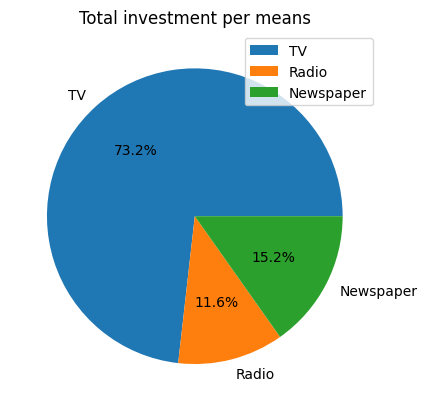

In [265]:
total_investment = sum_TV + sum_Radio + sum_Newspaper
invest_percent_TV = sum_TV/total_investment
print("invest_percent_TV",invest_percent_TV)
invest_percent_Radio = sum_Radio/total_investment
invest_percent_Newspaper = sum_Newspaper/total_investment
plt.pie([invest_percent_TV,invest_percent_Radio,invest_percent_Newspaper],labels = list_features_names, autopct='%1.1f%%')


plt.legend()
plt.title("Total investment per means")

Text(0.5, 1.0, 'Relationship Sales / advertising means')

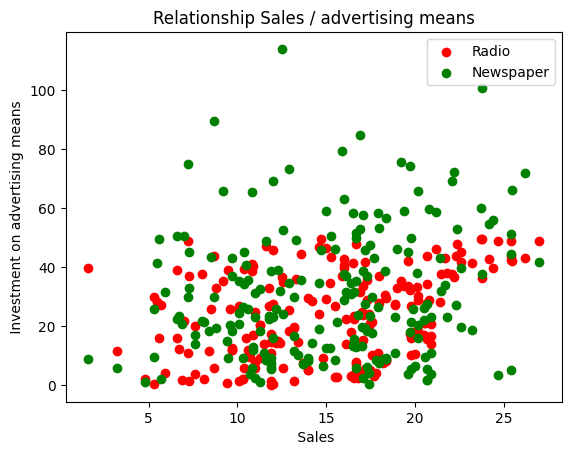

In [266]:
#plt.scatter(df["Sales"],df["TV"], color='blue', label = "TV")
plt.scatter( df["Sales"],df["Radio"], color='red', label = "Radio")
plt.scatter( df["Sales"],df["Newspaper"], color='green', label = "Newspaper")
plt.xlabel(" Sales")
plt.ylabel(" Investment on advertising means ")
plt.legend()
plt.title("Relationship Sales / advertising means")

In [267]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


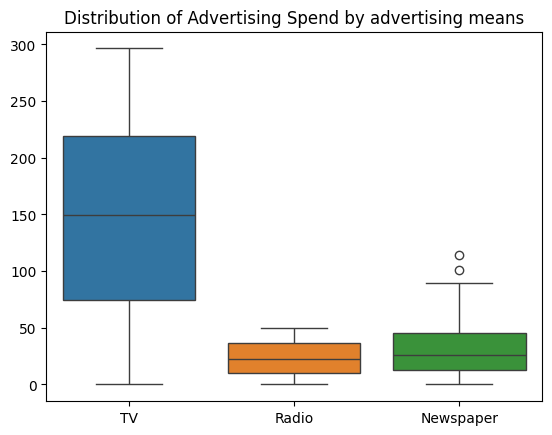

In [268]:
import seaborn as sns
sns.boxplot(data= X)
plt.title('Distribution of Advertising Spend by advertising means')
plt.show()

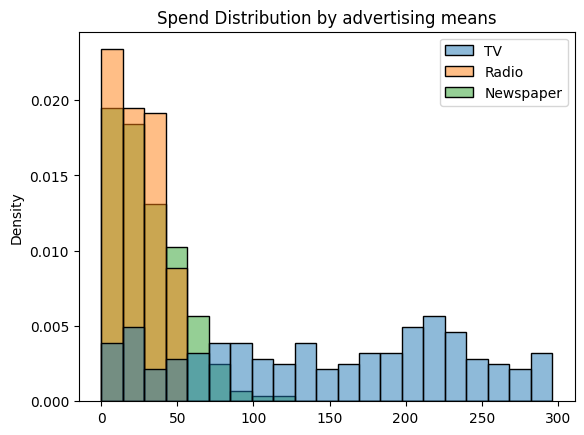

In [269]:
sns.histplot(data=X, stat='density', common_norm=False)
plt.title('Spend Distribution by advertising means')
plt.show()

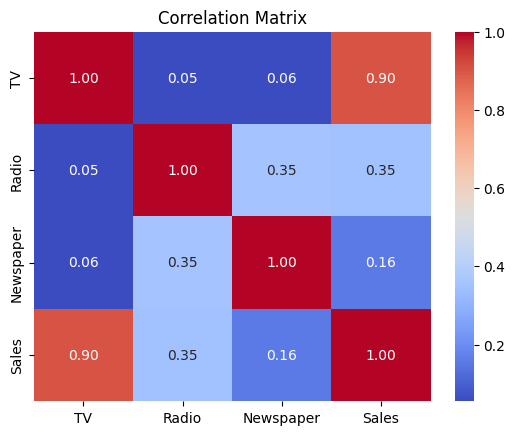

In [270]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Identification des corrélations

In [271]:
# Identification des corrélations
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


# 2. Préparation des données :

- Préparation des données :
    - Nettoyage des données (valeurs manquantes, outliers)
    - Normalisation ou standardisation si nécessaire
    - Séparation train/test

## Nettoyage des données (valeurs manquantes, outliers)

In [272]:
df.isna().any().sum()

np.int64(0)

In [273]:
q1q = df["TV"].quantile(0.25)
q1q

np.float64(74.375)

In [274]:
# outliers 

def find_outliers(df:pd.DataFrame, column_name:str)-> pd.DataFrame:
    q1 = df[column_name].quantile(0.25)
    print("q1",q1)
    q3 = df[column_name].quantile(0.75)
    print("q3",q3)
    
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    return df[(df[column_name] > lower_bound) | (df[column_name] < upper_bound )]

In [275]:
outliers_TV = find_outliers(df,"TV")
outliers_TV.shape

q1 74.375
q3 218.825


(200, 4)

## Normalisation ou standardisation si nécessaire

In [276]:
X = df.drop("Sales",axis=1)
X
y = df[["Sales"]]
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [ ]:
#should be done after the split to use fit_transfom with train data and transform with test data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)


## Séparation train/test

In [278]:


X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled,train_size=0.2, random_state=42)
X_train_without_TV = X_train[:,1:]
X_test_without_TV = X_test[:,1:]
X_train.shape


(40, 3)

# 3. Modélisation :
    

## Implémentation d’un modèle de régression linéaire


In [295]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
linreg_without_TV = LinearRegression()
linreg_without_TV.fit(X_train_without_TV,y_train)
print(f"model coef {linreg.coef_}")
print(f"model intercept {linreg.intercept_}")


model coef [[0.95026751 0.27420482 0.06660951]]
model intercept [0.01235046]


# 4. Évaluation :
## Utilisation de métriques pertinentes : RMSE, R², MAE


In [280]:
y_pred = linreg.predict(X_test)
y_pred_without_TV = linreg_without_TV.predict(X_test_without_TV)
y_pred_without_TV.shape

(160, 1)

In [281]:

y_pred.shape

(160, 1)

In [282]:
mse_without_TV = mean_squared_error(y_test,y_pred_without_TV)

In [283]:
# RMSE, R², MAE -- linreg

mse = mean_squared_error(y_test,y_pred) 
print("Mean Squared Error (MSE)",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE)",rmse)
r2 = r2_score(y_test,y_pred)
print("R-squared (R²)",r2)

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error (MAE) ",mae)

# RMSE, R², MAE -- linreg without TV

mse_without_TV = mean_squared_error(y_test,y_pred_without_TV) 
print("Mean Squared Error (MSE)",mse_without_TV)
rmse_without_TV = np.sqrt(mse_without_TV)
print("Root Mean Squared Error (RMSE)", rmse_without_TV)
r2_without_TV = r2_score(y_test,y_pred_without_TV)
print("R-squared (R²)",r2_without_TV)

mae_without_TV = mean_absolute_error(y_test,y_pred_without_TV)
print("Mean Absolute Error (MAE) ",mae_without_TV)

Mean Squared Error (MSE) 0.10307390293438437
Root Mean Squared Error (RMSE) 0.32105124658593737
R-squared (R²) 0.895132063806193
Mean Absolute Error (MAE)  0.2484617227259383
Mean Squared Error (MSE) 0.8771797631609637
Root Mean Squared Error (RMSE) 0.936578754382654
R-squared (R²) 0.10755265091474042
Mean Absolute Error (MAE)  0.8030393545234699


## Visualisation des prédictions

In [284]:

# Code
print(X_test.shape)
print(y_test.shape)


(160, 3)
(160, 1)


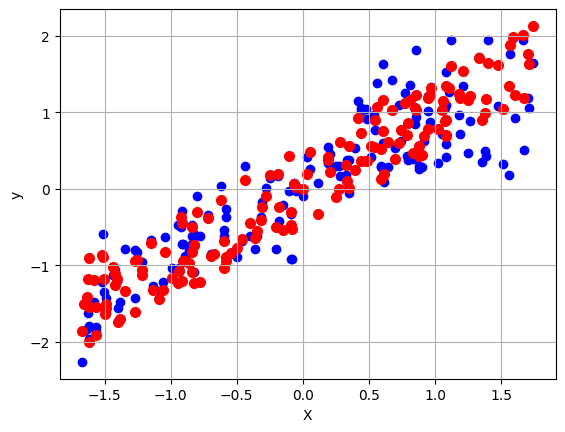

In [285]:
# cmp y_test & y_pred
plt.scatter(X_test[:,0].reshape(-1,1), y_test, color="blue", label="Actual")
plt.scatter(X_test[:,0].reshape(-1,1), y_pred, color="red", linewidth=2, label="Predicted")
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

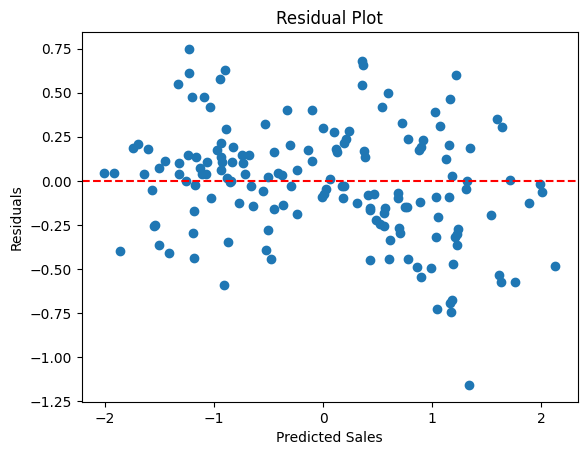

In [286]:
# residuls vs y_test 

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.show()

# Most relevant features

[0.84047258 0.20254761 0.        ]
Index(['TV', 'Radio', 'Newspaper'], dtype='object')


<BarContainer object of 3 artists>

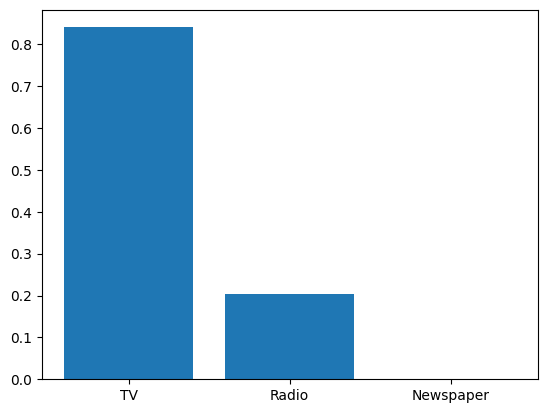

In [287]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)
print(lasso.coef_)
print(X.columns)
plt.bar( X.columns,lasso.coef_)

In [288]:
from sklearn.inspection import permutation_importance

result = permutation_importance(linreg, X_scaled, df['Sales'], n_repeats=10, random_state=0)
print(result.importances_mean)  # Average drop in performance per feature

[0.31979019 0.03609094 0.00389203]


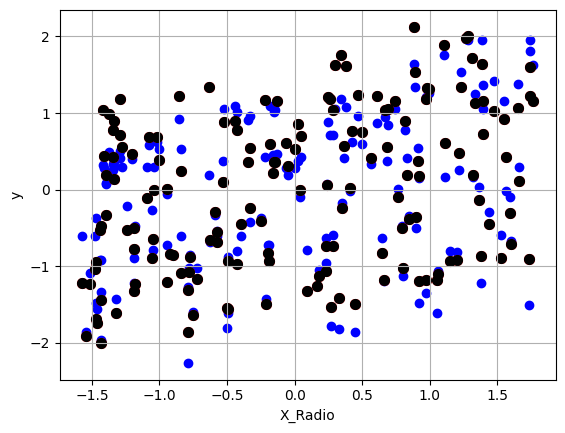

In [289]:
plt.scatter(X_test[:,1].reshape(-1,1), y_test, color="blue", label="Actual")
plt.scatter(X_test[:,1].reshape(-1,1), y_pred, color="red", linewidth=2, label="Predicted")
plt.scatter(X_test[:,1].reshape(-1,1), y_pred, color="black", linewidth=2, label="Predicted lasso")
plt.xlabel("X_Radio")
plt.ylabel("y")
plt.grid()
plt.show()

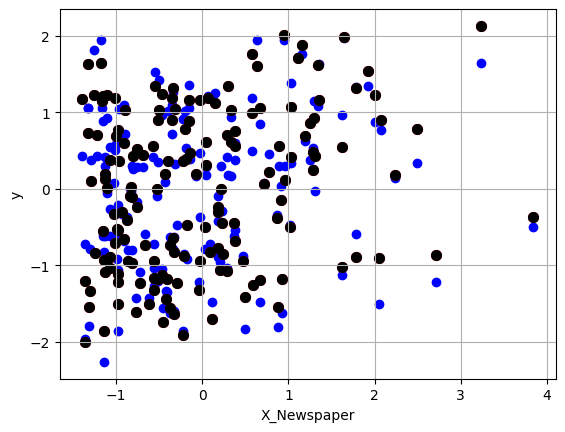

In [290]:
plt.scatter(X_test[:,2].reshape(-1,1), y_test, color="blue", label="Actual")
plt.scatter(X_test[:,2].reshape(-1,1), y_pred, color="red", linewidth=2, label="Predicted")
plt.scatter(X_test[:,2].reshape(-1,1), y_pred, color="black", linewidth=2, label="Predicted lasso")
plt.xlabel("X_Newspaper")
plt.ylabel("y")
plt.grid()
plt.show()

In [291]:
#cross validation
from sklearn.model_selection import KFold,cross_val_score
scores_dict = {}
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores_linreg = cross_val_score(linreg, X_train, y_train, scoring='r2', cv=folds)
print("scores lin_reg",scores_linreg )
scores_linreg_lasso= cross_val_score(lasso, X_train, y_train, scoring='r2', cv=folds)
print("scores_linreg_lasso",scores_linreg_lasso) 

"""Here are common reasons why you're getting negative R²:

    TV is an important feature, and your model linreg_without_TV doesn't include it.

    So the model is missing key explanatory power.

    The model is underfitting the data.

    Your training data is too small or not representative.

    Outliers or noise in the data.

    You're using a linear model on a nonlinear relationship.
    """
scores_linreg_without_TV= cross_val_score(linreg_without_TV, X_train_without_TV, y_train, scoring='r2', cv=folds)
print("scores_linreg_without_TV",scores_linreg_without_TV) 

scores lin_reg [0.84949569 0.7858383  0.85607918 0.83096466 0.79929506]
scores_linreg_lasso [0.81074763 0.80153479 0.77484835 0.91019353 0.76122154]
scores_linreg_without_TV [-0.07030521  0.00832508  0.05041726 -0.1184354  -0.36357732]


C:\Users\User\AppData\Local\Temp\ipykernel_14316\508584644.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([scores_linreg,scores_linreg_lasso,scores_linreg_without_TV], labels= ["Linear Regression","Lasso","LinReg without TV"])


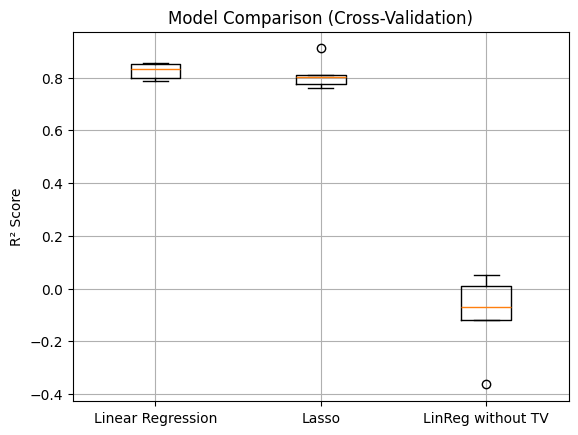

In [293]:
# 
plt.boxplot([scores_linreg,scores_linreg_lasso,scores_linreg_without_TV], labels= ["Linear Regression","Lasso","LinReg without TV"])
plt.ylabel("R² Score")
plt.title("Model Comparison (Cross-Validation)")
plt.grid(True)
plt.show()

# 5. Intégration simple du modèle dans un script interactif


## Intégrer votre modèle dans un script Python simple qui permet à un utilisateur de faire une prédiction à partir de nouvelles données.

In [ ]:
# Save model and scaler
joblib.dump({'model': linreg, 'scaler_X': scaler_X, 'scaler_y':scaler_y}, 'models/linear_model_and_scaler.pkl')

['models/linear_model_and_scaler.pkl']

In [ ]:
# Load model and scaler
loaded = joblib.load('models/linear_model_and_scaler.pkl')

loaded_model = loaded['model']
loaded_scaler_X = loaded['scaler_X']
loaded_scaler_y = loaded['scaler_y']


# Example usage
#X_new_scaled = loaded_scaler.transform(X_new)
#y_pred = loaded_model.predict(X_new_scaled)


new_investment = np.array([[2,100,100]])  #  double paire de crochets pour une forme 2D
new_investment_scaled = loaded_scaler_X.transform(new_investment)

# 3. Prédiction standardisée
sales_scaled = loaded_model.predict(new_investment_scaled)

# 4. Revenir à l’échelle réelle
real_sales = loaded_scaler_y.inverse_transform(sales_scaled)

print(f"sales for new_investment {real_sales[0][0]:,.2f} ")

sales for new_investment 15.32 


c:\Users\User\Desktop\ML_challenge_linear_regression\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
